### 多元线性回归（以波士顿房价为例）

Mean Squared Error: 24.291119474973456


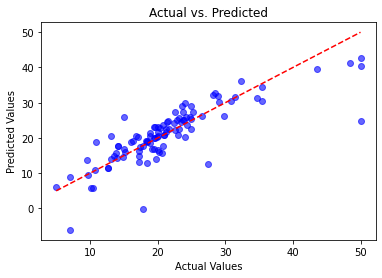

Text(0.5, 1.0, 'Residual Plot')

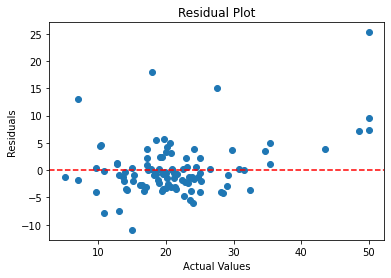

In [21]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
# 加载数据集
boston = load_boston()
X = boston.data
y = boston.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 绘制预测结果
# 回归评估可视化方案(对角线图)
plt.scatter(y_test, y_pred, c='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 绘制对角线
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 计算残差
residuals = y_test - y_pred

# 绘制残差图
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 多元多项式回归(以波士顿房价为例)

多项式次数最多为2，大于2都过拟合

Mean Squared Error: 14.183558215941154
决定系数（R2 Score）： 0.8065890288936419
运行时间（duration）： 0.017734527587890625


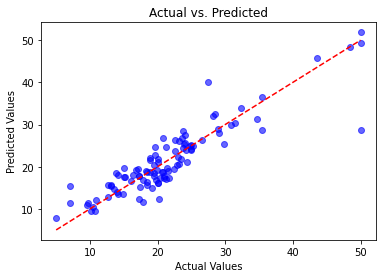

Text(0.5, 1.0, 'Residual Plot')

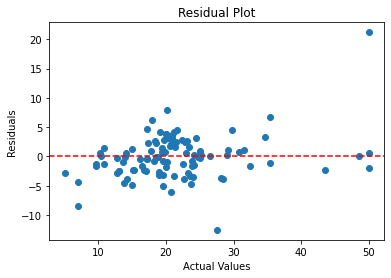

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
start = time()
# 加载数据集
boston = load_boston()
X = boston.data
y = boston.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 管道
pipeline = Pipeline([
    ("PolynomialFeatures", PolynomialFeatures(degree=2)),  # 多项式特征转换
    ("LinearRegression", LinearRegression())  # 线性回归模型训练
])

pipeline.fit(X_train, y_train)

# 预测结果
y_pred = pipeline.predict(X_test)


# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
r2_train = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print("决定系数（R2 Score）：", r2_train)
print("运行时间（duration）：", time() - start)

plt.scatter(y_test, y_pred, c='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [
         y_test.min(), y_test.max()], 'r--')  # 绘制对角线

plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 计算残差
residuals = y_test - y_pred

# 绘制残差图
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

### SLSQP算法拟合多项式(以波士顿房价为例)

可以看时间是比较久的，整体精度更高但是时间较慢

多项式回归模型拟合结果：
均方误差（MSE）： 13.98102789711109
决定系数（R2 Score）： 0.8093507890279484
运行时间（duration）： 2.8656318187713623


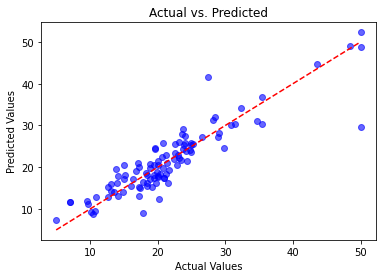

Text(0.5, 1.0, 'Residual Plot')

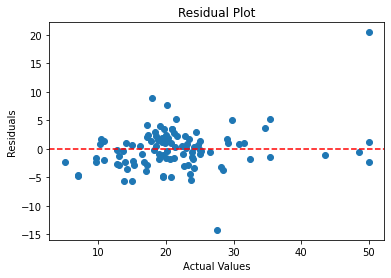

In [25]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score
from time import time

start = time()

# 加载波士顿数据集
boston = load_boston()
X = boston.data  # 特征矩阵
y = boston.target  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 创建PolynomialFeatures对象，生成多项式特征
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

# 定义损失函数（均方误差）
def loss_function(theta):
    y_pred = np.dot(X_poly, theta)
    mse = mean_squared_error(y_train, y_pred)
    return mse

# 定义约束条件（无约束）
constraints = ()

# 定义优化问题 初始参数x0（全零向量）
optimization_problem = minimize(loss_function, x0=np.zeros(X_poly.shape[1]), constraints=constraints, method='SLSQP')

# 获取优化结果
theta_optimized = optimization_problem.x

# 在测试集上进行预测
X_test_poly = poly_features.transform(X_test)
y_pred = np.dot(X_test_poly, theta_optimized)

# 计算测试集上的均方误差和决定系数
mse_train = mean_squared_error(y_test, y_pred)
r2_train = r2_score(y_test, y_pred)

# 输出结果
print("多项式回归模型拟合结果：")
print("均方误差（MSE）：", mse_train)
print("决定系数（R2 Score）：", r2_train)
print("运行时间（duration）：", time() - start)

plt.scatter(y_test, y_pred, c='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 绘制对角线

plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# 计算残差
residuals = y_test - y_pred

# 绘制残差图 
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')